In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys

import os, sys

%matplotlib inline

In [2]:
from box import Box
import glob

In [3]:
TOP = os.getcwd().replace("notebooks", "")
D1 = TOP + 'data/raw/'
figures_dir = TOP + 'reports/figures/'

In [4]:
import glob
import openpyxl
import seaborn as sns

In [5]:
file_list = glob.glob(D1 + "/*140124*.xlsx") # Include slash or it will search in the wrong directory!!

In [6]:
file_list

['/home/grace/Documents/python/liver-ml/data/raw/NM_under_all_featsel_140124.xlsx',
 '/home/grace/Documents/python/liver-ml/data/raw/CNN_under_all_feat_140124.xlsx',
 '/home/grace/Documents/python/liver-ml/data/raw/SMOTE_over_all_featsel_140124.xlsx',
 '/home/grace/Documents/python/liver-ml/data/raw/TK_under_all_featsel_140124.xlsx',
 '/home/grace/Documents/python/liver-ml/data/raw/random_under_all_featsel_140124.xlsx',
 '/home/grace/Documents/python/liver-ml/data/raw/liver_unbalanced_all_featuresel_140124.xlsx',
 '/home/grace/Documents/python/liver-ml/data/raw/ENN_under_all_featsel_140124.xlsx']

In [7]:
mylst = []
for f in file_list:
    mylst.append(pd.read_excel(f))

In [8]:
df = pd.concat(mylst)

In [9]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [40]:
df.classifier.unique()

array(['ANN1', 'GenRA', 'Gradient Boosting', 'KNN', 'LR', 'NB',
       'Random Forest', 'SVC'], dtype=object)

In [11]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'unbalanced')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.739900,0.035575,0.819225,0.081625,0.304150,0.130800,0.638025,0.033475,0.693225,0.032125
std,0.043166,0.019331,0.121989,0.038044,0.194518,0.062117,0.024993,0.012339,0.034442,0.014057
min,0.611000,0.006000,0.511000,0.011000,0.001000,0.006000,0.582000,0.008000,0.648000,0.006000
25%,0.724500,0.022250,0.773250,0.058250,0.152750,0.090750,0.620000,0.027250,0.660750,0.023000
50%,0.743000,0.036000,0.792500,0.080000,0.337500,0.125500,0.642500,0.035000,0.694000,0.032000
75%,0.768750,0.041000,0.901000,0.091250,0.436750,0.171250,0.654500,0.042000,0.717750,0.044000
max,0.790000,0.090000,0.998000,0.183000,0.711000,0.245000,0.681000,0.054000,0.767000,0.056000


In [12]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'unbalanced')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,0.037725,0.054350,0.037675,0.047300,0.955200,0.031450,0.803500,0.027875,0.055925,0.10660
std,0.053321,0.045551,0.082060,0.050802,0.073986,0.023617,0.048575,0.015897,0.059681,0.08837
min,0.000000,0.000000,0.000000,0.000000,0.536000,0.000000,0.530000,0.009000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.937750,0.005750,0.793750,0.009750,0.000000,0.00000
50%,0.015000,0.049500,0.010000,0.031500,0.969500,0.032000,0.810500,0.029500,0.050000,0.12800
75%,0.049750,0.093000,0.039000,0.072000,0.998250,0.050250,0.827250,0.039000,0.091000,0.18325
max,0.257000,0.129000,0.500000,0.254000,1.000000,0.097000,0.836000,0.081000,0.220000,0.24400


In [13]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'under')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.607305,0.079535,0.561205,0.114910,0.609845,0.137880,0.578495,0.048705,0.729245,0.062800
std,0.125618,0.047280,0.175608,0.060164,0.192939,0.076807,0.054716,0.015699,0.100862,0.048433
min,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.352000,0.006000,0.000000,0.000000
25%,0.562250,0.050000,0.475250,0.078000,0.563500,0.086000,0.551500,0.041000,0.725000,0.040000
50%,0.619000,0.068000,0.539500,0.095000,0.650500,0.109000,0.584000,0.048000,0.749500,0.050500
75%,0.683500,0.091000,0.642750,0.147250,0.722000,0.188000,0.614500,0.055250,0.765000,0.067250
max,0.791000,0.238000,1.000000,0.355000,1.000000,0.411000,0.676000,0.099000,0.833000,0.362000


In [14]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'under')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,0.128090,0.091750,0.216570,0.177920,0.787955,0.14220,0.693565,0.100515,0.122005,0.116610
std,0.088417,0.037685,0.199813,0.114643,0.185624,0.11577,0.122495,0.076388,0.067718,0.073697
min,0.000000,0.000000,0.000000,0.000000,0.313000,0.00000,0.375000,0.009000,0.000000,0.000000
25%,0.045750,0.078000,0.049500,0.085500,0.679000,0.04800,0.615750,0.040000,0.072750,0.066750
50%,0.120000,0.101500,0.160500,0.165000,0.846500,0.09000,0.732500,0.068500,0.143000,0.100500
75%,0.207000,0.120000,0.322750,0.274000,0.929000,0.25650,0.790000,0.176000,0.170750,0.173250
max,0.290000,0.144000,0.701000,0.473000,1.000000,0.46500,0.836000,0.311000,0.280000,0.319000


In [15]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'over')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.649175,0.069225,0.595575,0.111625,0.608500,0.137275,0.600300,0.047625,0.745275,0.047425
std,0.056593,0.019401,0.090212,0.036943,0.088903,0.067889,0.035932,0.006982,0.020401,0.013009
min,0.474000,0.039000,0.355000,0.057000,0.434000,0.057000,0.504000,0.033000,0.702000,0.022000
25%,0.624250,0.054000,0.546000,0.081000,0.549500,0.081250,0.579500,0.043000,0.734000,0.039750
50%,0.645500,0.066500,0.590500,0.103500,0.615000,0.113000,0.593500,0.048000,0.746000,0.048000
75%,0.680500,0.087250,0.649000,0.131750,0.656000,0.175500,0.616500,0.052500,0.758500,0.058250
max,0.760000,0.105000,0.785000,0.210000,0.811000,0.291000,0.681000,0.061000,0.792000,0.072000


In [16]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'over')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.191825,0.098225,0.310975,0.194325,0.691125,0.140900,0.628825,0.100225,0.161475,0.094025
std,0.046240,0.015431,0.148004,0.072050,0.143121,0.081066,0.096069,0.053971,0.028656,0.038784
min,0.063000,0.065000,0.051000,0.083000,0.409000,0.047000,0.438000,0.037000,0.089000,0.052000
25%,0.170250,0.088500,0.214500,0.136250,0.580750,0.080000,0.548250,0.059500,0.150000,0.066500
50%,0.202000,0.099500,0.289000,0.179000,0.728000,0.111500,0.653500,0.080000,0.162500,0.082500
75%,0.224500,0.112000,0.392250,0.243750,0.790250,0.212500,0.688750,0.148500,0.172000,0.112500
max,0.271000,0.125000,0.600000,0.366000,0.918000,0.370000,0.776000,0.252000,0.254000,0.239000


In [17]:
df_melt = df.melt(id_vars = ['tox', 'classifier', 'dt', 'sampling'], value_vars = ['mean_f1', 'mean_sensitivity', 'mean_specificity', 'mean_precision'], var_name = 'perf')

In [18]:
df_melt

,tox,classifier,dt,sampling,perf,value
0,chr_liver,ANN1,mrgn,under,mean_f1,0.011
1,chr_liver,GenRA,mrgn,under,mean_f1,0.362
2,chr_liver,Gradient Boosting,mrgn,under,mean_f1,0.447
3,chr_liver,KNN,mrgn,under,mean_f1,0.489
4,chr_liver,LR,mrgn,under,mean_f1,0.351
...,...,...,...,...,...,...
2235,dev_liver,KNN,cba,under,mean_precision,0.280
2236,dev_liver,LR,cba,under,mean_precision,0.212
2237,dev_liver,NB,cba,under,mean_precision,0.216
2238,dev_liver,Random Forest,cba,under,mean_precision,0.225


In [19]:
toxs1 = ['chr_liver']*3+['dev_liver']*3
sts = ['over', 'unbalanced', 'under']*2

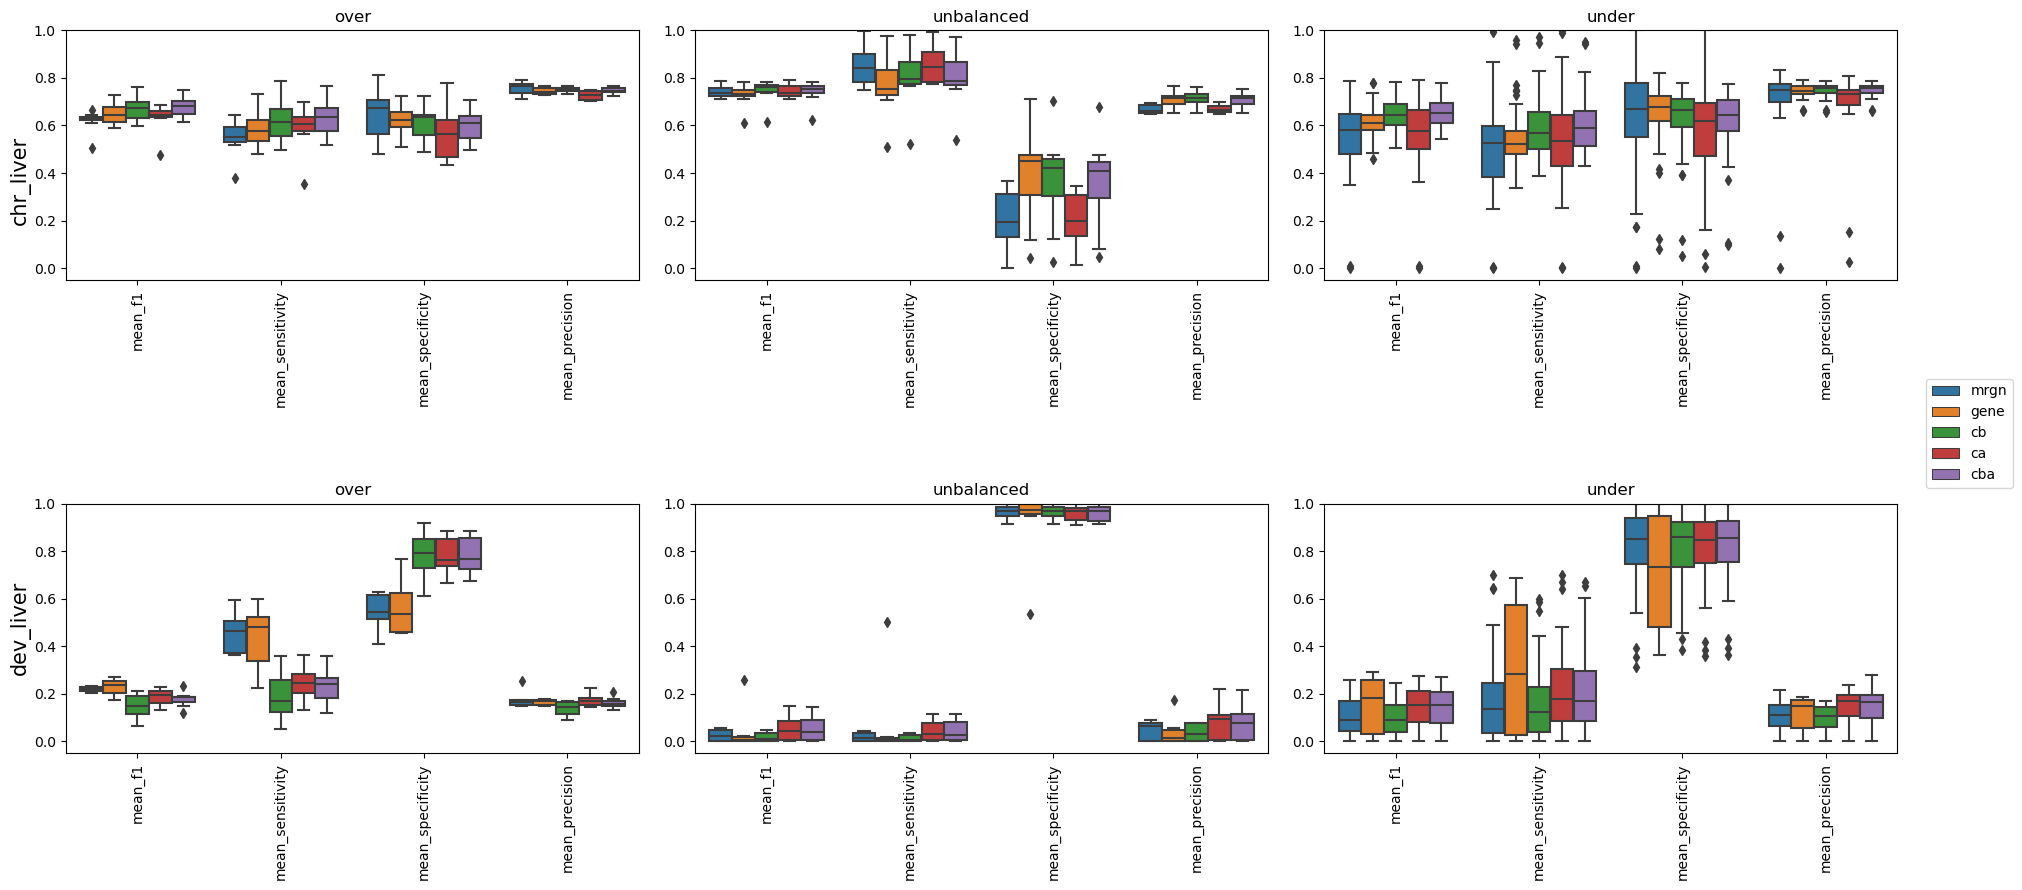

In [20]:
fig = plt.figure(figsize = (20,9))

for c,e, num in zip(sts, toxs1, range(1,7)):
    df0=df_melt[(df_melt['sampling'] == c) & (df_melt['tox'] == e)]
    ax = fig.add_subplot(2,3,num)
    sns.boxplot(x = 'perf', y = 'value', hue = 'dt', data = df0)
    ax.set_title(c)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    ax.get_legend().remove()
    
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
fig.text(0,0.75, "chr_liver", fontsize = 15, rotation = 'vertical')
fig.text(0,0.25, "dev_liver", fontsize = 15,rotation = 'vertical')
#fig.suptitle("chr_liver (a) and dev_liver (b)", fontsize = 14, )
plt.tight_layout()
plt.show()
fig.savefig(figures_dir+'Figure9r.png', dpi = 300)

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
anova_res = {}
for e in df.sampling.unique():
    model = ols('mean_f1 ~ C(dt)', data=df[(df['sampling']== e) &  (df['tox'] == 'chr_liver') ] ).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    anova_res[e] = aov_table

In [23]:
anova_res['unbalanced']

,sum_sq,df,F,PR(>F)
C(dt),0.001868,4.0,0.230907,0.919152
Residual,0.070799,35.0,NaN,NaN


In [24]:
anova_res['over']

,sum_sq,df,F,PR(>F)
C(dt),0.022325,4.0,1.904233,0.131589
Residual,0.102585,35.0,NaN,NaN


In [25]:
anova_res['under']

,sum_sq,df,F,PR(>F)
C(dt),0.332804,4.0,5.779094,0.000204
Residual,2.807394,195.0,NaN,NaN


In [26]:
anova_res1 = {}
for e in df.sampling.unique():
    model = ols('mean_f1 ~ C(dt)', data=df[(df['sampling']== e) &  (df['tox'] == 'dev_liver') ] ).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    anova_res1[e] = aov_table

In [27]:
anova_res1['unbalanced']

,sum_sq,df,F,PR(>F)
C(dt),0.008012,4.0,0.681441,0.609509
Residual,0.102872,35.0,NaN,NaN


In [28]:
anova_res1['over']

,sum_sq,df,F,PR(>F)
C(dt),0.036070,4.0,6.670474,0.000423
Residual,0.047315,35.0,NaN,NaN


In [29]:
anova_res1['under']

,sum_sq,df,F,PR(>F)
C(dt),0.092669,4.0,3.08788,0.017078
Residual,1.463019,195.0,NaN,NaN


In [30]:
df_melt[(df_melt['tox'] == 'chr_liver') & (df_melt['sampling'] == 'under')].groupby(['dt', 'perf']).mean()

value
dt   perf                      
ca   mean_f1           0.568950
     mean_precision    0.693200
     mean_sensitivity  0.547525
     mean_specificity  0.569225
cb   mean_f1           0.646700
     mean_precision    0.750675
     mean_sensitivity  0.591425
     mean_specificity  0.619475
cba  mean_f1           0.655000
     mean_precision    0.749850
     mean_sensitivity  0.603275
     mean_specificity  0.609575
gene mean_f1           0.613225
     mean_precision    0.745875
     mean_sensitivity  0.545425
     mean_specificity  0.641250
mrgn mean_f1           0.552650
     mean_precision    0.706625
     mean_sensitivity  0.518375
     mean_specificity  0.609700

In [31]:
df_melt[(df_melt['tox'] == 'dev_liver') & (df_melt['sampling'] == 'over')].groupby(['dt', 'perf']).mean()

value
dt   perf                      
ca   mean_f1           0.186750
     mean_precision    0.172250
     mean_sensitivity  0.243750
     mean_specificity  0.782125
cb   mean_f1           0.146000
     mean_precision    0.136625
     mean_sensitivity  0.190125
     mean_specificity  0.781125
cba  mean_f1           0.177250
     mean_precision    0.160750
     mean_sensitivity  0.232250
     mean_specificity  0.779000
gene mean_f1           0.228250
     mean_precision    0.165375
     mean_sensitivity  0.432875
     mean_specificity  0.567125
mrgn mean_f1           0.220875
     mean_precision    0.172375
     mean_sensitivity  0.455875
     mean_specificity  0.546250

In [32]:
mylst2 = []
for f in file_list:
    mylst2.append(pd.read_excel(f, sheet_name = 'raw'))

In [33]:
len(mylst2)

7

In [34]:
raw_df = pd.concat(mylst2)

In [35]:
raw_df.columns

Index(['Unnamed: 0', 'tox', 'classifier', 'kfeats', 'fit_time', 'score_time',
       'test_accuracy', 'test_f1', 'test_sensitivity', 'test_specificity',
       'test_precision', 'dt', 'balance', 'sampling'],
      dtype='object')

In [36]:
raw_df = raw_df.drop(['Unnamed: 0'], axis = 1)

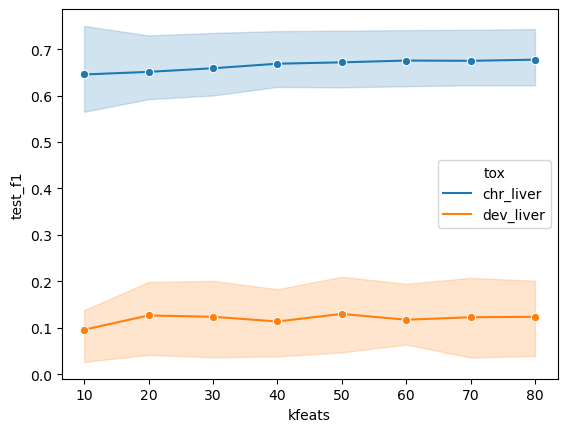

In [37]:
sns.lineplot(data = raw_df.groupby(['tox', 'kfeats', 'sampling']).mean().reset_index(), x = 'kfeats', y = 'test_f1', hue = 'tox', marker = 'o')
plt.savefig(figures_dir+'Figure10r.png', dpi = 300)

In [38]:
raw_melt = raw_df.melt(id_vars = ['tox', 'classifier', 'dt', 'kfeats','sampling'], value_vars = [ 'test_f1', 'test_sensitivity', 'test_specificity',
       'test_precision'], var_name = 'perf')

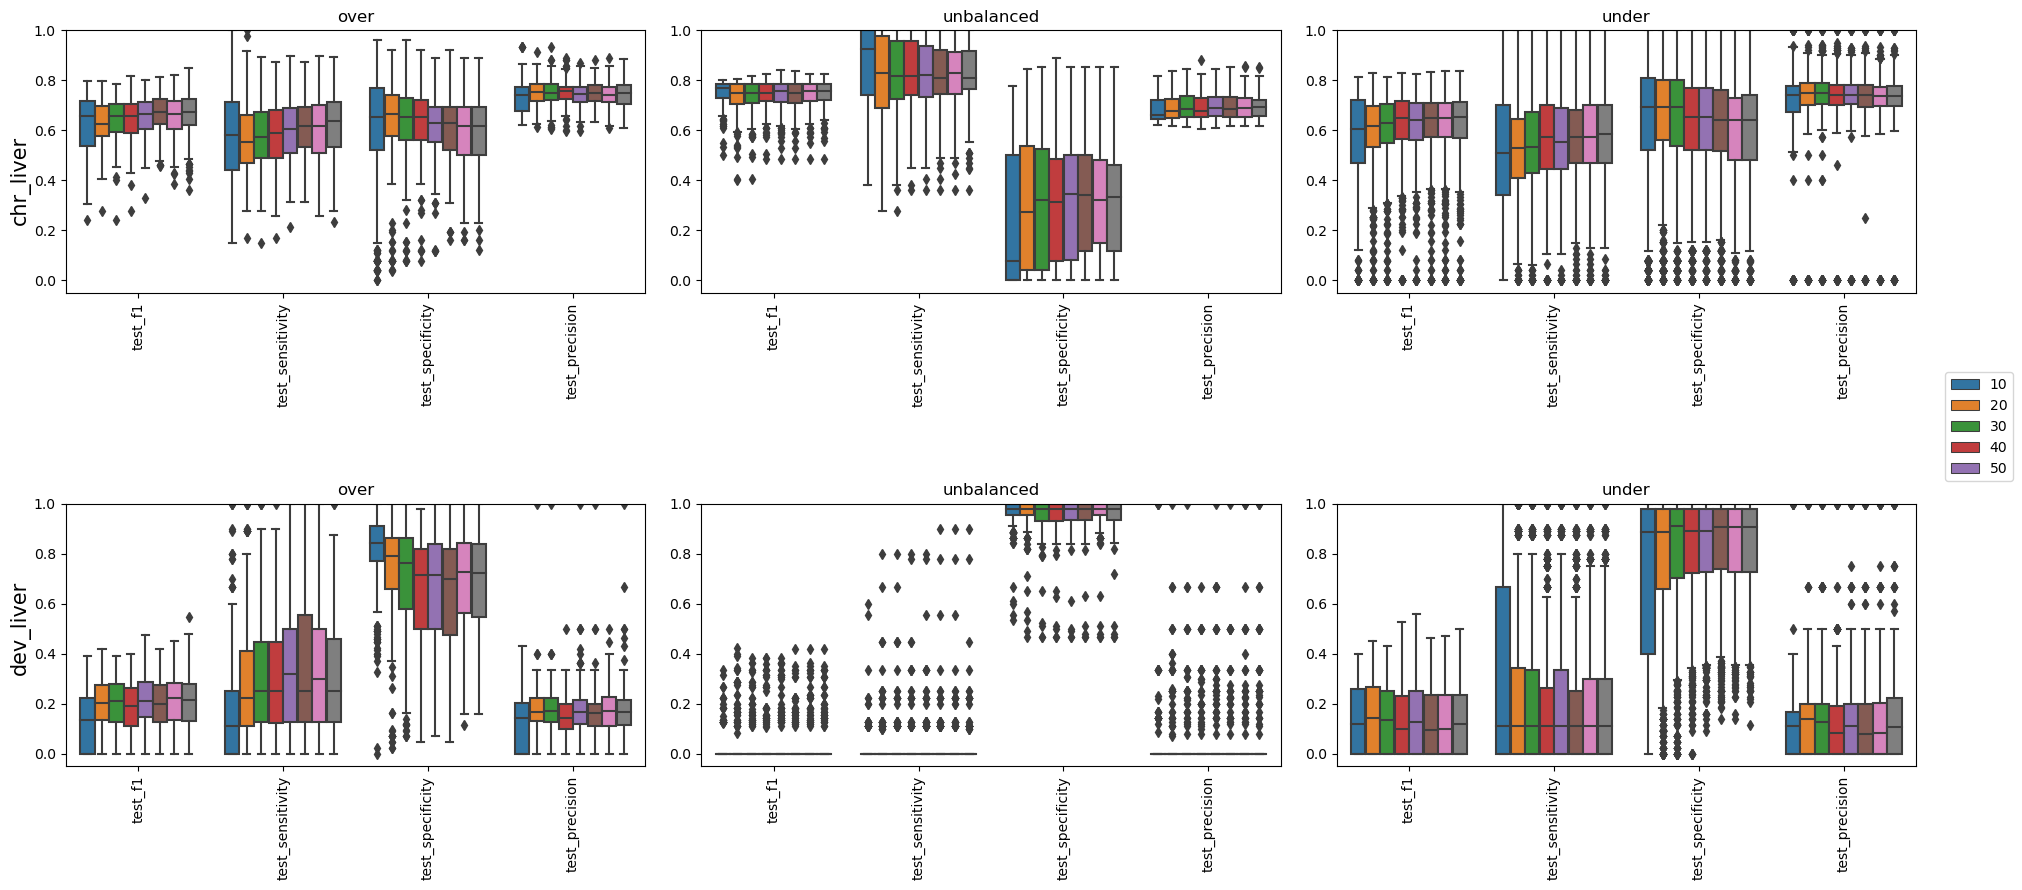

In [39]:
fig = plt.figure(figsize = (20,9))

for c,e, num in zip(sts, toxs1, range(1,7)):
    df0=raw_melt[(raw_melt['sampling'] == c) & (raw_melt['tox'] == e) ]
    ax = fig.add_subplot(2,3,num)
    sns.boxplot(x = 'perf', y = 'value', hue = 'kfeats', data = df0)
    ax.set_title(c)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    ax.get_legend().remove()
    
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
fig.text(0,0.75, "chr_liver", fontsize = 15, rotation = 'vertical')
fig.text(0,0.25, "dev_liver", fontsize = 15,rotation = 'vertical')
#fig.suptitle("chr_liver (a) and dev_liver (b)", fontsize = 14, )
plt.tight_layout()
plt.show()